## HW 2: Crossentropy method
_Reference: based on Practical RL course by YSDA_

In this notebook you have to solve two simple RL problems with crossentropy method.

To get used to `gymnasium` package, please, refer to the [documentation](https://gymnasium.farama.org/introduction/basic_usage/).


In the end of the notebook, please, copy the functions you have implemented to file `template_crossentropy.py` and submit it to the Contest.

In [38]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd
%matplotlib inline

print("All libraries imported successfully!")
print(f"Gymnasium version: {gym.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Gymnasium version: 1.2.0
NumPy version: 2.3.1


## Part 1. Tabular CrossEntropy
Let's consider discrete game "Taxi".

There are four designated pick-up and drop-off locations (Red, Green, Yellow and Blue) in the 5x5 grid world. The taxi starts off at a random square and the passenger at one of the designated locations.

The goal is move the taxi to the passenger’s location, pick up the passenger, move to the passenger’s desired destination, and drop off the passenger. Once the passenger is dropped off, the episode ends.

The player receives positive rewards for successfully dropping-off the passenger at the correct location. Negative rewards for incorrect attempts to pick-up/drop-off passenger and for each step where another reward is not received.

You can find full description of the environment [here](https://gymnasium.farama.org/environments/toy_text/taxi/).

![Taxi-v3](https://gymnasium.farama.org/_images/taxi.gif)

So here's how it works:

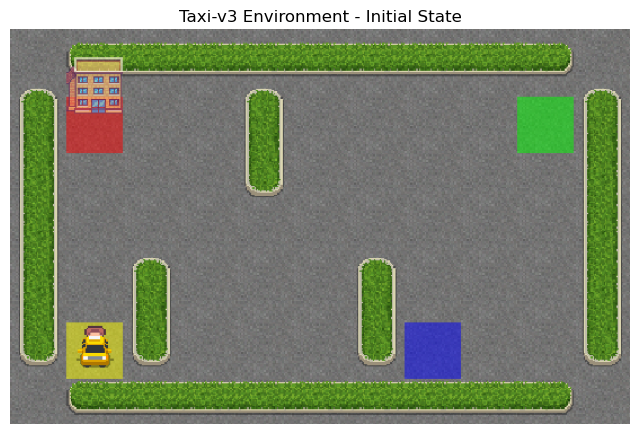

Initial state number: 408
Environment info: {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 1, 0], dtype=int8)}

🎯 UNDERSTANDING THE VISUAL:
🚕 Yellow square = Taxi
🔴 Red square = Red pickup/dropoff location
🟢 Green square = Green pickup/dropoff location
🟡 Yellow square = Yellow pickup/dropoff location
🔵 Blue square = Blue pickup/dropoff location
👨‍💼 Passenger location (if not in taxi)
🏢 Destination location

🔍 DECODED STATE 408:
   Taxi is at position: (4, 0)
   Passenger is at: Yellow
   Destination is: Red

📊 ENVIRONMENT DETAILS:
   Total possible states: 500
   Total possible actions: 6
   Action meanings:
      0: South
      1: North
      2: East
      3: West
      4: Pickup
      5: Dropoff

🎮 TAKING SOME RANDOM ACTIONS:
   Step 1: Action 5 (Dropoff) → Reward: -10
   Step 2: Action 5 (Dropoff) → Reward: -10
   Step 3: Action 1 (North) → Reward: -1

🔄 RESETTING ENVIRONMENT:
   New state: 203
   Taxi at: (2, 0)
   Passenger at: Red
   Destination: Blue


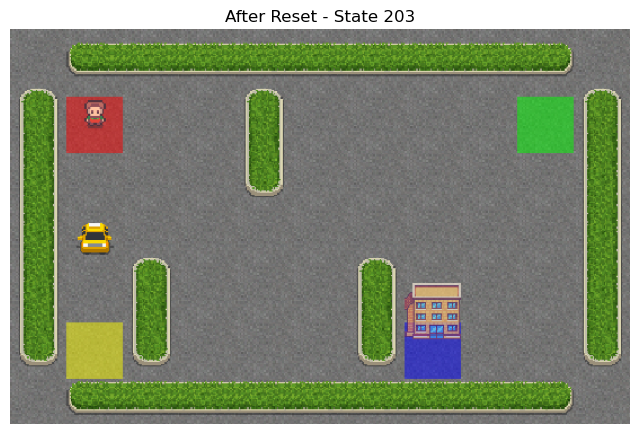


💡 KEY INSIGHT:
Each time we reset, we get a different random scenario!
The taxi, passenger, and destination locations change randomly.


In [40]:
## Create our taxi game world, the second parameter means
# we can see it as an image
env = gym.make("Taxi-v3", render_mode="rgb_array")
# Starts a fresh episode, randomly places taxi, passenger and destination
# Returns the starting state number
state, info = env.reset()

# Display the initial state
plt.figure(figsize=(8, 6))
plt.imshow(env.render())
plt.title("Taxi-v3 Environment - Initial State")
plt.axis('off') # Remove axis numbers for cleaner look
plt.show()

print(f"Initial state number: {state}")
print(f"Environment info: {info}")

print("\n🎯 UNDERSTANDING THE VISUAL:")
print("🚕 Yellow square = Taxi")
print("🔴 Red square = Red pickup/dropoff location")  
print("🟢 Green square = Green pickup/dropoff location")
print("🟡 Yellow square = Yellow pickup/dropoff location") 
print("🔵 Blue square = Blue pickup/dropoff location")
print("👨‍💼 Passenger location (if not in taxi)")
print("🏢 Destination location")

# Decode the state number
def decode_state(state_num):
    """Convert state number to row-col-passenger-destination"""
    # state = 100*taxi_row + 20*taxi_col + 4*passenger_location + destination
    taxi_row = state_num // 100
    taxi_col = (state_num % 100) // 20
    passenger_loc = (state_num % 20) // 4
    destination = state_num % 4

    # Location mapping
    locations = {0: "Red", 1: "Green", 2: "Yellow", 3: "Blue", 4: "In Taxi"}

    return {
        "taxi_position": (taxi_row, taxi_col),
        "passenger_location": locations[passenger_loc],
        "destination": locations[destination]
    }

decoded = decode_state(state)
print(f"\n🔍 DECODED STATE {state}:")
print(f"   Taxi is at position: {decoded['taxi_position']}")
print(f"   Passenger is at: {decoded['passenger_location']}")
print(f"   Destination is: {decoded['destination']}")

# Let's explore the environment properties
print(f"\n📊 ENVIRONMENT DETAILS:")
print(f"   Total possible states: {env.observation_space.n}")
print(f"   Total possible actions: {env.action_space.n}")
print(f"   Action meanings:")
for i in range(env.action_space.n):
    actions = ["South", "North", "East", "West", "Pickup", "Dropoff"]
    print(f"      {i}: {actions[i]}")

# Let's try taking a few random actions to see what happens
print(f"\n🎮 TAKING SOME RANDOM ACTIONS:")
for step in range(3):
    # Take random action
    action = env.action_space.sample()
    new_state, reward, done, truncated, info = env.step(action)
    
    actions = ["South", "North", "East", "West", "Pickup", "Dropoff"]
    print(f"   Step {step+1}: Action {action} ({actions[action]}) → Reward: {reward}")
    
    if done:
        print("   Episode finished!")
        break

# Reset and show the environment again
print(f"\n🔄 RESETTING ENVIRONMENT:")
state, info = env.reset()
decoded = decode_state(state)
print(f"   New state: {state}")
print(f"   Taxi at: {decoded['taxi_position']}")
print(f"   Passenger at: {decoded['passenger_location']}")
print(f"   Destination: {decoded['destination']}")

# Visualize the reset state
plt.figure(figsize=(8, 6))
plt.imshow(env.render())
plt.title(f"After Reset - State {state}")
plt.axis('off')
plt.show()

print("\n💡 KEY INSIGHT:")
print("Each time we reset, we get a different random scenario!")
print("The taxi, passenger, and destination locations change randomly.")

In [41]:
env.close() # Properly close and cleans up the environment

In [42]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i" % (n_states, n_actions))

n_states=500, n_actions=6


Let's make an action 1 and see what happens:

In [43]:
next_state, reward, is_done, _, _ = env.step(1)

In [44]:
decoded = decode_state(next_state)
print(f"   New state: {next_state}")
print(f"   Taxi at: {decoded['taxi_position']}")
print(f"   Passenger at: {decoded['passenger_location']}")
print(f"   Destination: {decoded['destination']}")

   New state: 103
   Taxi at: (1, 0)
   Passenger at: Red
   Destination: Blue


In [45]:
print(f"We got to state {next_state}, the reward is {reward}, game is not finished because is_done={is_done}")

We got to state 103, the reward is -1, game is not finished because is_done=False


### Create stochastic policy

This time our policy should be a probability distribution.

```policy[s,a] = P(take action a | in state s)```

Since we still use integer state and action representations, you can use a 2-dimensional array to represent the policy.

Please initialize policy __uniformly__, that is, probabililities of all actions should be equal.


In [46]:
policy = np.ones((n_states, n_actions)) / n_actions

# Let's break down what this single line does
print("🎯 BREAKING DOWN THE CODE:")
print(f"   np.ones((n_states, n_actions)) creates a {n_states}×{n_actions} array filled with 1's")
print(f"   / n_actions divides every element by {n_actions}")
print(f"   Result: every element becomes 1/{n_actions} = {1/n_actions:.3f}")

# Verify the result
print(f"\n✅ VERIFICATION:")
print(f"   Policy shape: {policy.shape}")
print(f"   First state probabilities: {policy[0]}")
print(f"   Sum of probabilities for state 0: {policy[0].sum()}")
print(f"   All rows sum to 1? {np.allclose(policy.sum(axis=1), 1.0)}")

# Show what this means practically
print(f"\n🎲 WHAT THIS POLICY DOES:")
print(f"   In ANY state, each action has {1/n_actions:.1%} chance of being chosen")
print(f"   This is called a 'uniform random policy'")
print(f"   It's our starting point before learning begins")

# Quick test - sample some actions
print(f"\n🧪 QUICK TEST:")
test_state = 42
print(f"   Sampling 10 actions from state {test_state}:")
for i in range(10):
    # Sample action based on probabilities
    action = np.random.choice(n_actions, p=policy[test_state])
    actions = ["South", "North", "East", "West", "Pickup", "Dropoff"]
    print(f"   Sample {i+1}: Action {action} ({actions[action]})")

print(f"\n🚀 Ready for Cross-Entropy Method!")

🎯 BREAKING DOWN THE CODE:
   np.ones((n_states, n_actions)) creates a 500×6 array filled with 1's
   / n_actions divides every element by 6
   Result: every element becomes 1/6 = 0.167

✅ VERIFICATION:
   Policy shape: (500, 6)
   First state probabilities: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
   Sum of probabilities for state 0: 0.9999999999999999
   All rows sum to 1? True

🎲 WHAT THIS POLICY DOES:
   In ANY state, each action has 16.7% chance of being chosen
   This is called a 'uniform random policy'
   It's our starting point before learning begins

🧪 QUICK TEST:
   Sampling 10 actions from state 42:
   Sample 1: Action 4 (Pickup)
   Sample 2: Action 1 (North)
   Sample 3: Action 1 (North)
   Sample 4: Action 2 (East)
   Sample 5: Action 2 (East)
   Sample 6: Action 1 (North)
   Sample 7: Action 3 (West)
   Sample 8: Action 3 (West)
   Sample 9: Action 4 (Pickup)
   Sample 10: Action 2 (East)

🚀 Ready for Cross-Entropy Method!


In [47]:
assert type(policy) in (np.ndarray, np.matrix)
assert np.allclose(policy, 1./n_actions)
assert np.allclose(np.sum(policy, axis=1), 1)

In [48]:
policy

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]], shape=(500, 6))

### Play the game

Just like before, but we also record all states and actions we took.

Sample the action (e.g. `np.random.choice()`) from available actions and make a step in the environment using `env.step()`.

In [49]:
def generate_session(env, policy, t_max=int(10**4)):
    """
    Play game until end or for t_max ticks.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states, actions = [], []
    total_reward = 0.

    s, info = env.reset()

    for t in range(t_max):
        # your code here - sample action from policy and get new state, reward, done flag etc. from the environment
        a = np.random.choice(n_actions, p=policy[s])
        new_s, r, done, truncated, info = env.step(a)
        assert new_s is not None and r is not None and done is not None
        assert a is not None
        # your code here
        # Record state, action and add up reward to states,actions and total_reward accordingly.
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

In [50]:
s, a, r = generate_session(env=env, policy=policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) in [float, np.float64]

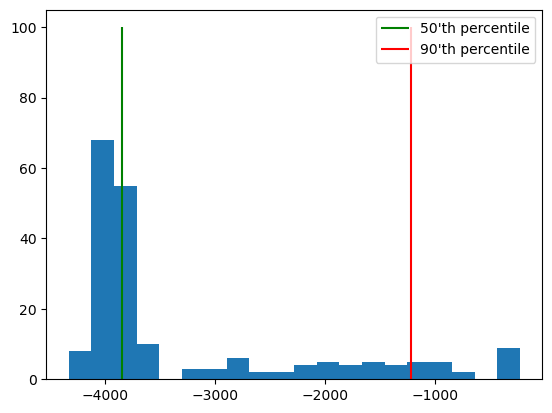

In [53]:
# let's see the initial reward distribution
import matplotlib.pyplot as plt
%matplotlib inline

sample_rewards = [generate_session(env=env, policy=policy, t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_rewards, bins=20)
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()
plt.show()

In [54]:
np.percentile(sample_rewards, 50)

np.float64(-3844.0)

### Crossentropy method steps

In [55]:
# Cell 13: Select Elite Episodes Function

def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]
    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions
    """
    
    # STEP 1: Calculate the reward threshold
    reward_threshold = np.percentile(rewards_batch, percentile)
    
    # STEP 2: Initialize lists to store elite states and actions
    elite_states = []
    elite_actions = []
    
    # STEP 3: Go through each episode
    for i in range(len(rewards_batch)):
        # Check if this episode's reward is above threshold
        if rewards_batch[i] >= reward_threshold:
            # This is an elite episode! Add all its states and actions
            elite_states.extend(states_batch[i])  # extend adds all elements from the list
            elite_actions.extend(actions_batch[i])
    
    return elite_states, elite_actions

# Test our function with some example data
print("🧪 TESTING select_elites function:")

# Create some example data (3 episodes)
example_states = [
    [0, 1, 2],      # Episode 1 states
    [3, 4, 5, 6],   # Episode 2 states  
    [7, 8]          # Episode 3 states
]
example_actions = [
    [0, 1, 2],      # Episode 1 actions
    [1, 2, 3, 4],   # Episode 2 actions
    [2, 3]          # Episode 3 actions  
]
example_rewards = [-100, 50, -200]  # Episode rewards

print(f"Example data:")
print(f"  States: {example_states}")
print(f"  Actions: {example_actions}")
print(f"  Rewards: {example_rewards}")

# Test with 50th percentile
elite_states, elite_actions = select_elites(example_states, example_actions, example_rewards, percentile=50)
print(f"\nUsing 50th percentile:")
print(f"  Threshold: {np.percentile(example_rewards, 50)}")
print(f"  Elite states: {elite_states}")
print(f"  Elite actions: {elite_actions}")

# Test with real data from our taxi episodes
print(f"\n🚗 TESTING WITH REAL TAXI DATA:")

# Generate a few episodes
real_states_batch = []
real_actions_batch = []
real_rewards_batch = []

for i in range(5):
    states, actions, total_reward = generate_session(env, policy)
    real_states_batch.append(states)
    real_actions_batch.append(actions)
    real_rewards_batch.append(total_reward)

print(f"Generated {len(real_rewards_batch)} episodes:")
for i, reward in enumerate(real_rewards_batch):
    print(f"  Episode {i}: {len(real_states_batch[i])} steps, reward = {reward}")

# Select elites from real data
elite_states, elite_actions = select_elites(real_states_batch, real_actions_batch, real_rewards_batch, percentile=70)

print(f"\nElite selection (70th percentile):")
print(f"  Threshold: {np.percentile(real_rewards_batch, 70):.1f}")
print(f"  Elite states: {len(elite_states)} total")
print(f"  Elite actions: {len(elite_actions)} total")
print(f"  First 10 elite states: {elite_states[:10]}")
print(f"  First 10 elite actions: {elite_actions[:10]}")

# Verify our function works correctly
assert len(elite_states) == len(elite_actions), "States and actions must have same length!"
print(f"\n✅ Function works correctly!")

print(f"\n💡 KEY INSIGHTS:")
print(f"   🎯 This function identifies the best episodes")
print(f"   📚 We extract ALL state-action pairs from elite episodes")
print(f"   🔄 These pairs become our training data")
print(f"   🚀 Cross-Entropy Method learns from these examples!")

🧪 TESTING select_elites function:
Example data:
  States: [[0, 1, 2], [3, 4, 5, 6], [7, 8]]
  Actions: [[0, 1, 2], [1, 2, 3, 4], [2, 3]]
  Rewards: [-100, 50, -200]

Using 50th percentile:
  Threshold: -100.0
  Elite states: [0, 1, 2, 3, 4, 5, 6]
  Elite actions: [0, 1, 2, 1, 2, 3, 4]

🚗 TESTING WITH REAL TAXI DATA:
Generated 5 episodes:
  Episode 0: 662 steps, reward = -2306.0
  Episode 1: 388 steps, reward = -1303.0
  Episode 2: 433 steps, reward = -1447.0
  Episode 3: 796 steps, reward = -2980.0
  Episode 4: 317 steps, reward = -1115.0

Elite selection (70th percentile):
  Threshold: -1331.8
  Elite states: 705 total
  Elite actions: 705 total
  First 10 elite states: [423, 423, 423, 423, 423, 323, 343, 243, 263, 263]
  First 10 elite actions: [3, 0, 3, 5, 1, 2, 1, 2, 4, 4]

✅ Function works correctly!

💡 KEY INSIGHTS:
   🎯 This function identifies the best episodes
   📚 We extract ALL state-action pairs from elite episodes
   🔄 These pairs become our training data
   🚀 Cross-Entrop

In [56]:
states_batch = [
    [1, 2, 3],     # game1
    [4, 2, 0, 2],  # game2
    [3, 1],        # game3
]

actions_batch = [
    [0, 2, 4],     # game1
    [3, 2, 0, 1],  # game2
    [3, 3],        # game3
]
rewards_batch = [
    3,  # game1
    4,  # game2
    5,  # game3
]

test_result_0 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=0)
test_result_40 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=100)

assert np.all(test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1])  \
    and np.all(test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]),\
    "For percentile 0 you should return all states and actions in chronological order"
assert np.all(test_result_40[0] == [4, 2, 0, 2, 3, 1]) and \
    np.all(test_result_40[1] == [3, 2, 0, 1, 3, 3]),\
    "For percentile 30 you should only select states/actions from two first"
assert np.all(test_result_90[0] == [3, 1]) and \
    np.all(test_result_90[1] == [3, 3]),\
    "For percentile 90 you should only select states/actions from one game"
assert np.all(test_result_100[0] == [3, 1]) and\
    np.all(test_result_100[1] == [3, 3]),\
    "Please make sure you use >=, not >. Also double-check how you compute percentile."
print("Ok!")

Ok!


In [62]:
# Cell 15: Update Policy Function

def update_policy(elite_states, elite_actions, n_states=n_states, n_actions=n_actions):
    """
    Given elite states/actions, return new updated policy where each action probability 
    is proportional to how often that action was taken in that state in elite episodes.
    """
    
    # STEP 1: Initialize policy with zeros
    new_policy = np.zeros((n_states, n_actions))
    
    # STEP 2: Count how often each (state, action) pair occurred in elite episodes
    for state, action in zip(elite_states, elite_actions):
        new_policy[state, action] += 1
    
    # STEP 3: Normalize each state to get valid probabilities
    for state in range(n_states):
        total_count = new_policy[state].sum()
        
        if total_count > 0:
            # This state was visited - normalize to get probabilities
            new_policy[state] = new_policy[state] / total_count
        else:
            # This state was never visited - use uniform distribution
            new_policy[state] = np.ones(n_actions) / n_actions
    
    return new_policy

# Test our function with a simple example
print("🧪 TESTING update_policy function:")

# Create simple test data
test_elite_states = [0, 0, 1, 1, 1, 2]
test_elite_actions = [0, 1, 1, 1, 2, 3]

print(f"Test data:")
print(f"  Elite states: {test_elite_states}")
print(f"  Elite actions: {test_elite_actions}")

# Create a small policy for testing (4 states, 4 actions)
test_policy = update_policy(test_elite_states, test_elite_actions, n_states=4, n_actions=4)

print(f"\nResulting policy:")
for state in range(4):
    print(f"  State {state}: {test_policy[state]} (sum = {test_policy[state].sum():.1f})")

# Verify the results manually
print(f"\n🔍 MANUAL VERIFICATION:")
print(f"  State 0: actions [0,1] each appeared 1 time → probabilities [0.5, 0.5, 0.0, 0.0]")
print(f"  State 1: action 1 appeared 2 times, action 2 appeared 1 time → probabilities [0.0, 0.67, 0.33, 0.0]")
print(f"  State 2: action 3 appeared 1 time → probabilities [0.0, 0.0, 0.0, 1.0]")
print(f"  State 3: never visited → uniform probabilities [0.25, 0.25, 0.25, 0.25]")

# Test with real taxi data
print(f"\n🚗 TESTING WITH REAL TAXI DATA:")

# Generate some episodes and select elites
states_batch = []
actions_batch = []
rewards_batch = []

for i in range(10):
    states, actions, reward = generate_session(env, policy)
    states_batch.append(states)
    actions_batch.append(actions)
    rewards_batch.append(reward)

# Select elites (top 30%)
elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=70)

print(f"Generated {len(rewards_batch)} episodes")
print(f"Elite data: {len(elite_states)} state-action pairs")

# Update policy
new_policy = update_policy(elite_states, elite_actions)

print(f"Policy updated!")
print(f"Old policy (state 0): {policy[0]}")
print(f"New policy (state 0): {new_policy[0]}")

# Verify policy properties
print(f"\n✅ VERIFICATION:")
print(f"  Policy shape: {new_policy.shape}")
print(f"  All rows sum to 1: {np.allclose(new_policy.sum(axis=1), 1.0)}")
print(f"  All probabilities >= 0: {np.all(new_policy >= 0)}")
print(f"  All probabilities <= 1: {np.all(new_policy <= 1)}")

print(f"\n💡 HOW THIS WORKS:")
print(f"   📊 Count how often each action was taken in each state (in elite episodes)")
print(f"   🎯 Convert counts to probabilities (normalize)")
print(f"   🎲 Actions taken more often in elite episodes get higher probabilities")
print(f"   🔄 Unvisited states get uniform probabilities")
print(f"   🚀 This gradually shifts policy toward successful behaviors!")

🧪 TESTING update_policy function:
Test data:
  Elite states: [0, 0, 1, 1, 1, 2]
  Elite actions: [0, 1, 1, 1, 2, 3]

Resulting policy:
  State 0: [0.5 0.5 0.  0. ] (sum = 1.0)
  State 1: [0.         0.66666667 0.33333333 0.        ] (sum = 1.0)
  State 2: [0. 0. 0. 1.] (sum = 1.0)
  State 3: [0.25 0.25 0.25 0.25] (sum = 1.0)

🔍 MANUAL VERIFICATION:
  State 0: actions [0,1] each appeared 1 time → probabilities [0.5, 0.5, 0.0, 0.0]
  State 1: action 1 appeared 2 times, action 2 appeared 1 time → probabilities [0.0, 0.67, 0.33, 0.0]
  State 2: action 3 appeared 1 time → probabilities [0.0, 0.0, 0.0, 1.0]
  State 3: never visited → uniform probabilities [0.25, 0.25, 0.25, 0.25]

🚗 TESTING WITH REAL TAXI DATA:
Generated 10 episodes
Elite data: 1176 state-action pairs
Policy updated!
Old policy (state 0): [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
New policy (state 0): [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]

✅ VERIFICATION:
  Policy shape

In [63]:
elite_states = [1, 2, 3, 4, 2, 0, 2, 3, 1]
elite_actions = [0, 2, 4, 3, 2, 0, 1, 3, 3]

new_policy = update_policy(elite_states, elite_actions)

assert np.isfinite(new_policy).all(
), "Your new policy contains NaNs or +-inf. Make sure you don't divide by zero."
assert np.all(
    new_policy >= 0), "Your new policy can't have negative action probabilities"
assert np.allclose(new_policy.sum(
    axis=-1), 1), "Your new policy should be a valid probability distribution over actions"
reference_answer = np.array([
    [1.,  0.,  0.,  0.,  0.],
    [0.5,  0.,  0.,  0.5,  0.],
    [0.,  0.33333333,  0.66666667,  0.,  0.],
    [0.,  0.,  0.,  0.5,  0.5]])
assert np.allclose(new_policy[:4, :5], reference_answer)
print("Ok!")

Ok!


### Training loop
Generate sessions, select N best and fit to those.

In [64]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress.
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

In [65]:
# reset policy just in case
policy = np.ones([n_states, n_actions]) / n_actions

mean reward = -47.868, threshold=-41.000


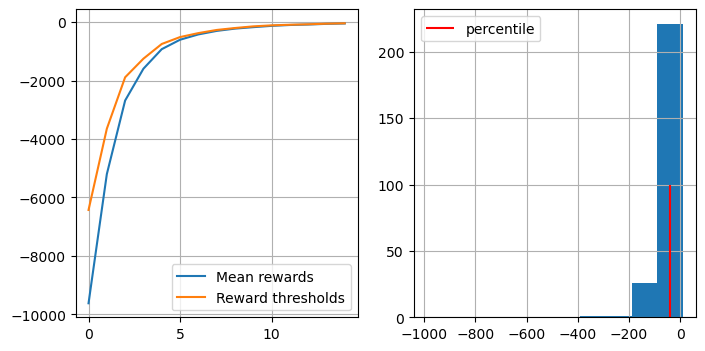

You Win!


In [67]:
n_sessions = 250
percentile = 50  
learning_rate = 0.5
log = []

for i in range(100):
    # CORRECTED: Proper function call with both env and policy
    sessions = [generate_session(env, policy) for _ in range(n_sessions)]
    
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)
    new_policy = update_policy(elite_states, elite_actions)
    policy = learning_rate * new_policy + (1 - learning_rate) * policy
    
    show_progress(rewards_batch, log, percentile)
    
    if np.mean(rewards_batch) > -50:
        print("You Win!")
        break

Congratulations! You've just trained your first RL model!
Now copy functions from this notebook to `template_crossentropy.py` and submit it to the Contest problem `Tabular CrossEntropy`.

## Part 2: Approximate crossentropy and neural nets.

In this section you will train a neural network policy for continuous state space game

You can find full description of the environment [here](https://www.gymlibrary.dev/environments/classic_control/cart_pole/).

![CartPole-v0"](https://www.gymlibrary.dev/_images/cart_pole.gif)

So here's how it works:

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

In [73]:
# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0", render_mode="rgb_array").env

env.reset()
n_actions = env.action_space.n

/home/kaanr/miniconda3/envs/ml_nlp/lib/python3.11/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


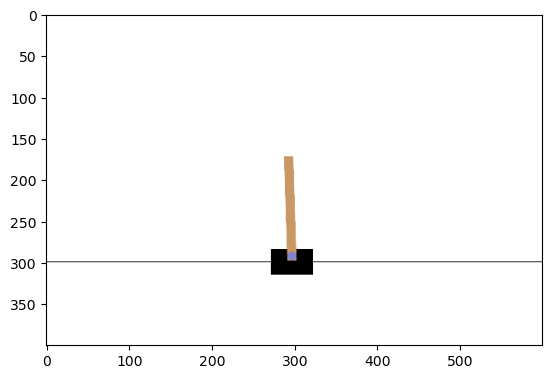

In [74]:
plt.imshow(env.render())
plt.show()

It is fine to use sklearn for such simple network, but we recommend you write the solution with PyTorch ;)

In [91]:
class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, n_actions, hidden_size=64):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, n_actions)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=-1)
    
    def fit(self, X, y):
        """FIXED: Convert object arrays to float arrays and numpy scalars to integers"""
        # Convert list to numpy array
        if isinstance(X, list):
            X = np.array(X)
        
        # FIX THE OBJECT ARRAY PROBLEM:
        if X.dtype == object:
            # Convert object array to float array
            X = np.array([np.array(x, dtype=np.float32) for x in X])
        
        # Convert to float32 if needed
        X = X.astype(np.float32)
        
        # FIX: Convert numpy scalars to regular integers
        if isinstance(y, list):
            y = [int(action.item()) if hasattr(action, 'item') else int(action) for action in y]
        
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.LongTensor(y)
        
        self.train()
        optimizer.zero_grad()
        outputs = self.forward(X_tensor)
        loss = F.cross_entropy(outputs, y_tensor)
        loss.backward()
        optimizer.step()

# Create agent
state_dim = env.observation_space.shape[0]
agent = PolicyNetwork(state_dim, n_actions)
optimizer = torch.optim.Adam(agent.parameters(), lr=0.01)

# Initialize agent
agent.fit([env.reset()[0]]*n_actions, range(n_actions))

Update the generate_session function and beat the game!

In [92]:
def generate_session_cartpole(t_max=300):
    states, actions = [], []
    total_reward = 0

    s, info = env.reset()

    for t in range(t_max):
        # Get action probabilities
        state_tensor = torch.FloatTensor(s).unsqueeze(0)
        agent.eval()
        with torch.no_grad():
            action_probs = agent(state_tensor).numpy()[0]
        
        a = np.random.choice(n_actions, p=action_probs)

        new_s, r, done, truncated, info = env.step(a)

        # FIX: Store states without object conversion, but store actions as numpy scalars
        states.append(s.astype(dtype="object"))  # Keep this for compatibility
        actions.append(np.array(a))  # Store as numpy scalar so .item() works
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

In [93]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=70):
    reward_threshold = np.percentile(rewards_batch, percentile)
    elite_states = []
    elite_actions = []
    
    for i in range(len(rewards_batch)):
        if rewards_batch[i] >= reward_threshold:
            elite_states.extend(states_batch[i])
            elite_actions.extend(actions_batch[i])
    
    return elite_states, elite_actions

def show_progress(rewards_batch, log, percentile, reward_range):
    mean_reward = np.mean(rewards_batch)
    print(f"Mean reward: {mean_reward:.1f}")


In [94]:
n_sessions = 100
percentile = 70
log = []

for i in range(100):
    # generate new sessions
    sessions = [generate_session_cartpole() for _ in range(n_sessions)]

    states_batch, actions_batch, rewards_batch = zip(*sessions)

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    agent.fit(elite_states, elite_actions)

    if max(rewards_batch) > min(rewards_batch):
        show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])

    if np.mean(rewards_batch) > 210:
        print("You Win!")
        break

Mean reward: 20.8
Mean reward: 24.1
Mean reward: 28.6
Mean reward: 32.4
Mean reward: 39.7
Mean reward: 43.9
Mean reward: 54.5
Mean reward: 58.0
Mean reward: 67.8
Mean reward: 71.1
Mean reward: 67.8
Mean reward: 72.0
Mean reward: 78.1
Mean reward: 77.0
Mean reward: 71.3
Mean reward: 69.2
Mean reward: 62.9
Mean reward: 68.4
Mean reward: 64.9
Mean reward: 66.0
Mean reward: 63.7
Mean reward: 58.0
Mean reward: 63.1
Mean reward: 63.7
Mean reward: 67.4
Mean reward: 65.9
Mean reward: 62.5
Mean reward: 73.2
Mean reward: 63.2
Mean reward: 65.7
Mean reward: 67.1
Mean reward: 65.8
Mean reward: 79.4
Mean reward: 113.0
Mean reward: 116.2
Mean reward: 116.7
Mean reward: 100.1
Mean reward: 100.1
Mean reward: 101.1
Mean reward: 113.8
Mean reward: 123.3
Mean reward: 125.3
Mean reward: 124.4
Mean reward: 141.2
Mean reward: 147.2
Mean reward: 152.7
Mean reward: 144.0
Mean reward: 156.4
Mean reward: 143.3
Mean reward: 123.7
Mean reward: 119.8
Mean reward: 125.7
Mean reward: 135.5
Mean reward: 159.6
Mean re

### Submission generation
To generate submission run the following block of code and submit the generated file to the contest problem `CrossEntropy CartPole`.

In [95]:
# DO NOT CHANGE THIS BLOCK
sessions = [generate_session_cartpole() for _ in range(n_sessions)]
states_batch, actions_batch, rewards_batch = zip(*sessions)
elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

sessions_to_send = []
for session in sessions:
  observations = [x.tolist() for x in session[0]]
  actions = [x.item() for x in session[1]]
  sessions_to_send.append((observations, actions))

import json
with open('sessions_to_send.json', 'w') as iofile:
  json.dump(sessions_to_send, iofile, ensure_ascii=True, indent=4)
# DO NOT CHANGE THIS BLOCK